# Hack Srijit's mystery method into the evaluation part of the pipeline
Q: Can I just replace the data in one of the generated integrated output files with random data, delete the metrics part and it'll use the new data?

Before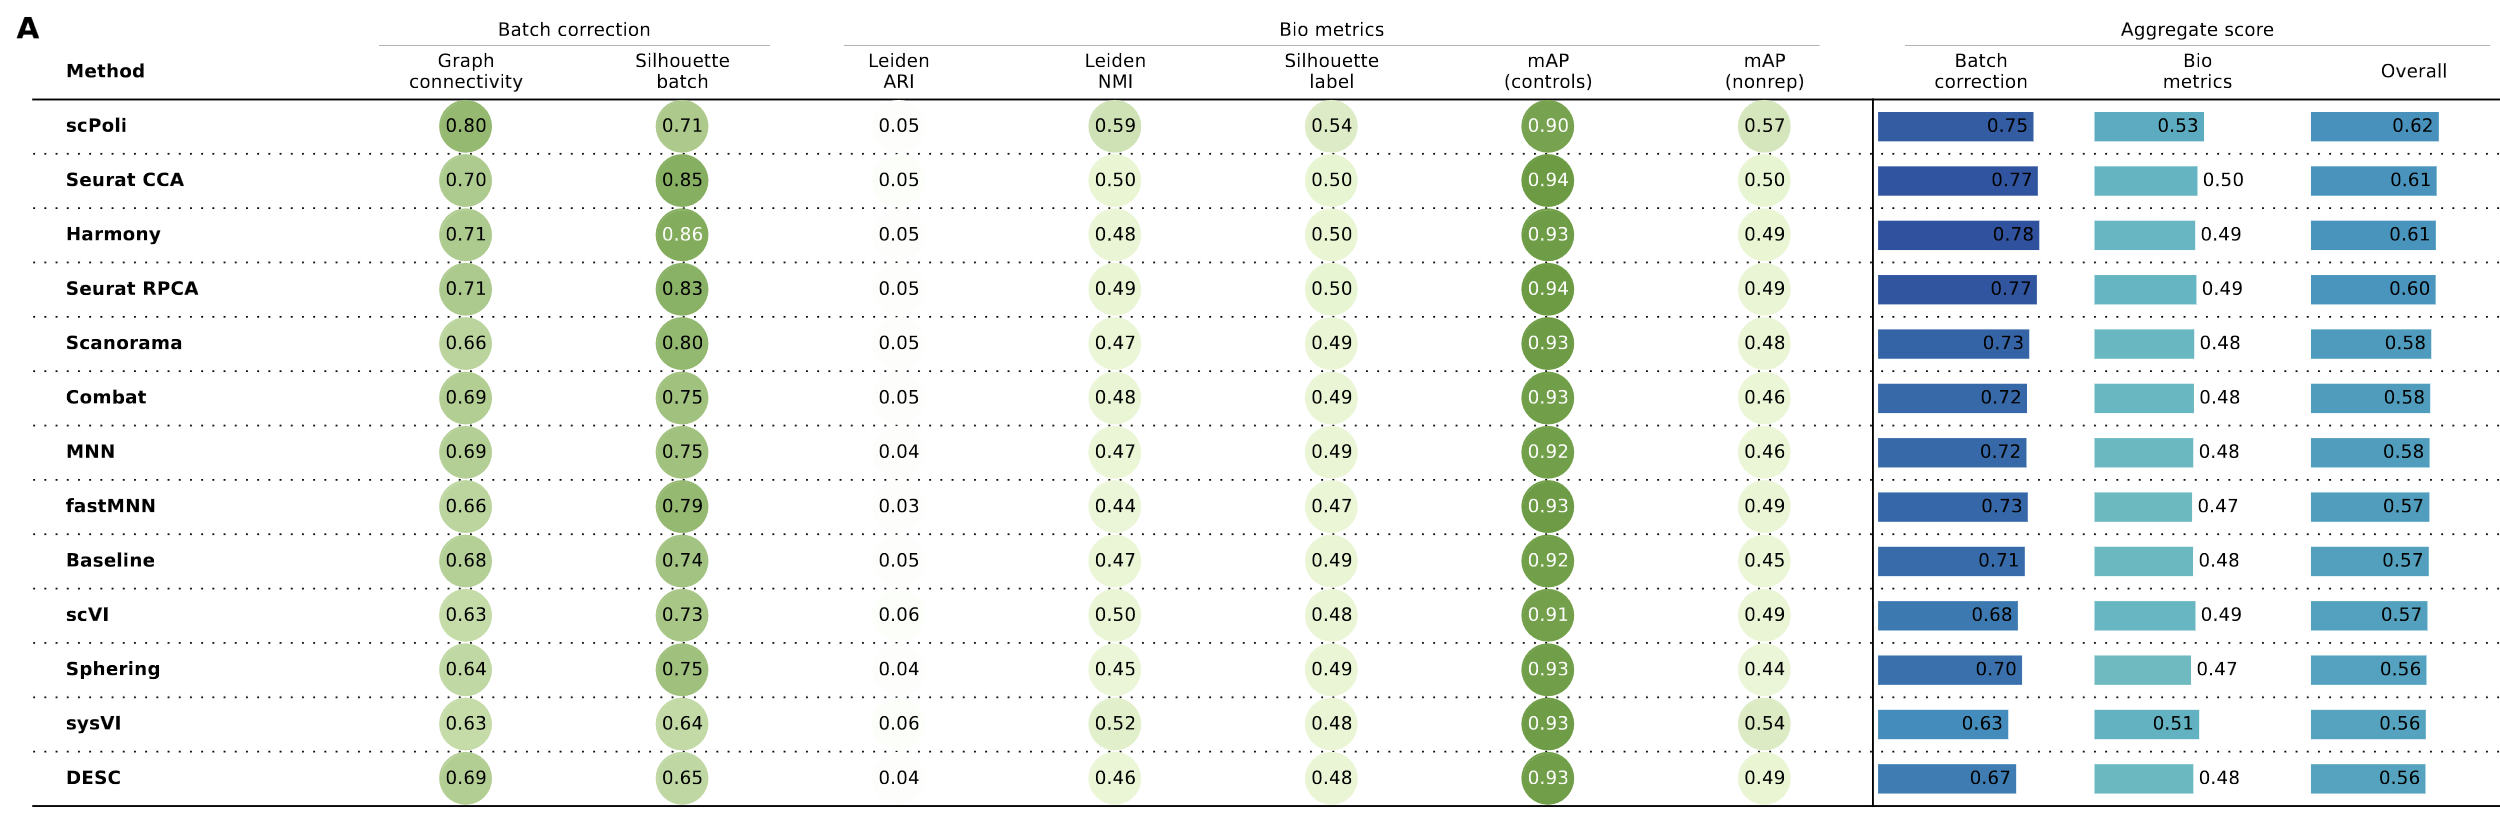

Let's scramble `Combat`, we'd then expect it to drop to last place

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_parquet("/home/icb/tim.treis/projects/broad_integrate/2023_Arevalo_BatchCorrection/outputs/scenario_6/mad_int_featselect_combat.parquet")
data

,combat_0,combat_1,combat_2,combat_3,combat_4,combat_5,combat_6,combat_7,combat_8,combat_9,...,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_JCP2022,Metadata_Batch,Metadata_PlateType,Metadata_PertType,Metadata_Row,Metadata_Column,Metadata_Microscope
0,-0.126714,0.473022,0.132660,-0.138964,0.274129,0.236246,0.210773,0.065751,0.639097,-1.511038,...,source_2,1053597936,A01,JCP2022_043547,20210712_Batch_5,TARGET2,trt,A,01,CV8000
1,-1.211442,1.755985,1.407480,1.744006,1.854882,-1.282524,1.680503,0.830362,-1.086552,1.606822,...,source_2,1053597936,K22,JCP2022_019314,20210712_Batch_5,TARGET2,trt,K,22,CV8000
2,-0.450988,-0.136982,0.803322,0.310373,-0.084745,0.906579,0.448751,-0.060630,0.299731,-2.346957,...,source_2,1053597936,K21,JCP2022_072945,20210712_Batch_5,TARGET2,trt,K,21,CV8000
3,-0.477462,0.171542,0.462330,0.649680,0.732728,-0.176849,1.116459,0.398412,0.670224,0.476209,...,source_2,1053597936,K20,JCP2022_002206,20210712_Batch_5,TARGET2,trt,K,20,CV8000
4,-0.449454,-0.836177,0.657804,-0.519165,0.942725,-0.219997,-1.453047,0.837757,1.256383,0.095389,...,source_2,1053597936,K19,JCP2022_051319,20210712_Batch_5,TARGET2,trt,K,19,CV8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11887,0.700056,0.291591,-0.285268,0.133339,0.160116,0.537363,0.277262,0.111759,-0.460957,-1.116400,...,source_6,110000297122,F03,JCP2022_007419,p211123CPU2OS48hw384exp036JUMP,TARGET2,trt,F,03,CV8000
11888,-0.654534,0.206163,-0.082994,0.672162,0.261239,0.114662,0.348746,-0.814862,1.289443,0.397327,...,source_6,110000297122,F02,JCP2022_048928,p211123CPU2OS48hw384exp036JUMP,TARGET2,trt,F,02,CV8000
11889,-0.766429,-0.316381,0.883714,-0.321377,-0.798516,-0.203227,0.929239,-0.948961,-0.294163,0.864844,...,source_6,110000297122,F01,JCP2022_021857,p211123CPU2OS48hw384exp036JUMP,TARGET2,trt,F,01,CV8000
11890,-1.253494,0.907832,1.272996,0.889754,-0.270434,0.699392,0.673076,-0.634177,1.342684,-0.275809,...,source_6,110000297122,H23,JCP2022_090051,p211123CPU2OS48hw384exp036JUMP,TARGET2,trt,H,23,CV8000


## Get data columns

In [11]:
data_columns = data.filter(like="combat_").columns
data_columns

Index(['combat_0', 'combat_1', 'combat_2', 'combat_3', 'combat_4', 'combat_5',
       'combat_6', 'combat_7', 'combat_8', 'combat_9',
       ...
       'combat_1004', 'combat_1005', 'combat_1006', 'combat_1007',
       'combat_1008', 'combat_1009', 'combat_1010', 'combat_1011',
       'combat_1012', 'combat_1013'],
      dtype='object', length=1014)

In [15]:
data_scrambled = data.copy()

for col in data_columns:
    data_scrambled[col] = np.random.permutation(data[col].values)

## Assess that we destroyed the info

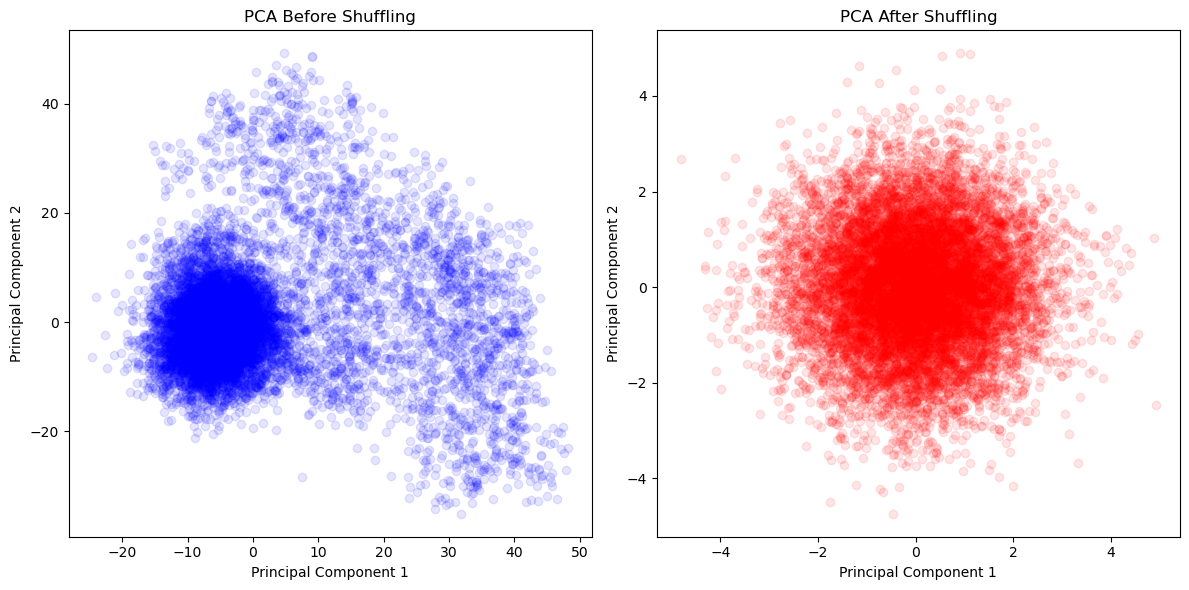

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[data_columns])
scaled_data_shuffled = scaler.fit_transform(data_scrambled[data_columns])

pca_before = PCA(n_components=2)
pca_after = PCA(n_components=2)

pca_before_result = pca_before.fit_transform(scaled_data)
pca_after_result = pca_after.fit_transform(scaled_data_shuffled)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_before_result[:, 0], pca_before_result[:, 1], color='blue', alpha=0.1)
plt.title('PCA Before Shuffling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(pca_after_result[:, 0], pca_after_result[:, 1], color='red', alpha=0.1)
plt.title('PCA After Shuffling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

Yeah, all gaussian noise now essentially.

## Write back to file, delete `metrics` and `plots` folders and and rerun pipeline

In [24]:
data_scrambled.to_parquet("/home/icb/tim.treis/projects/broad_integrate/2023_Arevalo_BatchCorrection/outputs/scenario_6/mad_int_featselect_combat.parquet")